# **Projeto de Bioinformática - Descoberta Computacional de Medicamentos [Parte 4] Modelos de Regressão com Floresta Aleatória**

Juan Oliveira

Na **Parte 4**, construiremos um modelo de regressão de inibidores da VHC usando o algoritmo de floresta aleatória.

---

## **1. Importando as bibliotecas necessárias**

In [ ]:
import pandas as pd # Importando o pacote pandas para manipulação de dados
import seaborn as sns # Importando o pacote seaborn para visualização de dados
from sklearn.model_selection import train_test_split # Essa classe é usada para dividir os dados em conjuntos de treinamento e teste
from sklearn.ensemble import RandomForestRegressor # Essa classe implementa um modelo de regressão baseado em florestas aleatórias

## **2. Carregando o data set**
"Lembrando que este conjunto de dados foi construído a partir da Parte 3 do mesmo projeto, especificamente relacionado à VHC.

Vamos abordar a diferença entre os descritores de Lipinski e as impressões digitais POP-can. Os descritores de Lipinski fornecem um conjunto de características moleculares simples, oferecendo uma visão geral rápida das propriedades das moléculas. Historicamente, Christopher Lipinski criou um conjunto de quatro descritores que ele investigou em sua pesquisa. Esses descritores são responsáveis pelas propriedades da “gota de luz”. Ele analisou um conjunto de substâncias ativas e criou a famosa “regra dos cinco”. Se uma molécula passar nessa regra, ela tem potencial para ser um bom candidato a fármaco.

Por outro lado, as dez principais impressões digitais descrevem características locais das moléculas. Os descritores de Lipinski, por sua vez, descrevem características globais da molécula, como tamanho, solubilidade e o número de doadores e aceitadores de ligações de hidrogênio. Imagine as moléculas como blocos de construção de Lego: cada molécula é composta por vários desses blocos, e a maneira como eles estão conectados cria propriedades únicas para o medicamento. Essa é a essência da descoberta e do design de medicamentos.

Portanto, precisamos encontrar uma maneira de reorganizar esses “blocos de Lego” de forma que a molécula seja potente para interagir com a proteína-alvo, ao mesmo tempo em que seja segura e não cause efeitos colaterais."

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) # Importando o módulo drive do pacote google.colab para montar o Google Drive

proj_path = '/content/gdrive/MyDrive/Colab Notebooks/' # Especificando uma variável de caminho (caminho do projeto)

file_name6='VHC_06_bioactivity_data_3class_pIC50_pubchem_fp.csv' # Nome do arquivo CSV a ser lido
df = pd.read_csv(proj_path + file_name6) # Lendo o arquivo CSV e armazenando os dados em um DataFrame chamado df
df # Exibindo o DataFrame df

Mounted at /content/gdrive


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.283997
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.657577
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.657577
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.376751
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.585027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.785156
568,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.744727
569,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.701147
570,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.318759


## 3. Recursos de entrada
O conjunto de dados ***VHC*** contém 572 recursos de entrada e 1 variável de saída (valores pIC50).

### **3.1. Recursos de entrada**

In [ ]:
X = df.drop('pIC50', axis=1)## foi eliminado a coluna de pIC50 porque a coluna de pIC50 sera usada como a variavel Y, contento somente as impressoes digitais de pubchem X
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
568,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
569,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
570,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0



### **3.2. Recursos de saída**

In [ ]:
Y = df.pIC50 # Criando uma variável Y que armazena os valores da coluna 'pIC50' do DataFrame df
Y # Exibindo os valores de Y

0      6.283997
1      6.657577
2      6.657577
3      6.376751
4      7.585027
         ...   
567    6.785156
568    8.744727
569    7.701147
570    8.318759
571    7.210419
Name: pIC50, Length: 572, dtype: float64


### **3.3. Vamos examinar a dimensão dos dados**

In [ ]:
X.shape # Verificando a forma (shape) do DataFrame X

(572, 881)

In [ ]:
Y.shape # Verificando a forma (shape) do DataFrame Y

(572,)


### **3.4. Remover recursos de baixa variação**
A remoção de recursos de baixa variação é um processo de pré-processamento de dados, ela se refere à eliminação de variáveis ou características de um conjunto de dados que têm variação muito baixa, ou seja, cujos valores são quase constantes ou mudam muito pouco em relação ao conjunto de dados como um todo.

A remoção de recursos de baixa variação é importante por várias razões:

Eficiência Computacional: Variáveis com baixa variação não fornecem muita informação útil e podem aumentar a complexidade computacional das análises sem contribuir significativamente para os resultados.

Redução de Ruído: Variáveis com baixa variação podem ser consideradas como "ruído" nos dados, pois não fornecem informações discriminativas para identificar padrões ou relações importantes.

Melhor Generalização: Em aprendizado de máquina, a remoção de recursos de baixa variação pode ajudar a evitar problemas de superajuste (overfitting) e levar a modelos mais generalizáveis.

Facilitação da Interpretação: Um conjunto de dados mais limpo, sem recursos de baixa variação, torna mais fácil a interpretação dos resultados e insights.

In [ ]:
from sklearn.feature_selection import VarianceThreshold # Importando a classe VarianceThreshold do pacote sklearn.feature_selection
selection = VarianceThreshold(threshold=(.8 * (1 - .8))) # Criando uma instância da classe VarianceThreshold com um limiar de variância
X = selection.fit_transform(X) # Aplicando a remoção de recursos de baixa variação ao conjunto de dados X

In [ ]:
X.shape # Verificando a forma (shape) do DataFrame X

(572, 199)


## **4. Divisão de dados (proporção 80/20)**
Isso foi feito para minimizar ainda mais os dados que sao menos uteis para essa pesquisa, em outras palavras, A divisão de dados na proporção 80/20 segue o Princípio de Pareto (ou regra 80/20). Essa regra afirma que 80% dos resultados são derivados de 20% das causas. Na prática, isso significa que, ao dividir dados, 80% deles são usados para treinamento e 20% para teste. Essa abordagem é comum em machine learning e análise de dados, permitindo avaliar modelos com eficiência e otimizar recursos.

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
# X_train e Y_train conterão 80% dos dados para treinamento
# X_test e Y_test conterão 20% dos dados para teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

“Quando trabalhamos com modelos de aprendizado de máquina, é comum separar os dados em duas partes: uma para treinamento e outra para teste. A matriz X_train e o vetor Y_train contêm 80% dos dados para treinamento, enquanto a matriz X_test e o vetor Y_test contêm os 20% restantes para teste. Essa divisão é importante para avaliar o desempenho do modelo em dados não vistos e evitar o overfitting (ajuste excessivo aos dados de treinamento). Além disso, essa proporção é uma escolha razoável para manter um equilíbrio entre dados de treinamento e teste.”

In [ ]:
X_train.shape, Y_train.shape # Verificando a forma (shape) da matriz de treinamento X_train

((457, 199), (457,))

In [ ]:
X_test.shape, Y_test.shape # Verificando a forma (shape) da matriz de teste X_train

((115, 199), (115,))


## **5. Construindo um modelo de regressão usando Random Forest**
 Random Forest é originalmente um algoritmo de aprendizado de máquina utilizado para tarefas de classificação e regressão, e ele se baseia em uma técnica chamada "ensemble learning".

Aqui está uma explicação mais detalhada de como um modelo de regressão usando Random Forest funciona:

Random Forest (Floresta Aleatória): O Random Forest é um algoritmo de aprendizado de máquina que cria múltiplas árvores de decisão durante o treinamento. Cada árvore de decisão é construída a partir de uma amostra aleatória do conjunto de dados e com um subconjunto aleatório de características (variáveis preditoras). Isso introduz aleatoriedade e diversidade nas árvores, o que ajuda a evitar o superajuste (overfitting) e torna o modelo mais robusto.

Regressão com Random Forest: Quando aplicado à regressão, em vez de prever classes ou categorias, um modelo de regressão usando Random Forest é usado para prever valores numéricos ou contínuos. Cada árvore de decisão no Random Forest gera uma previsão, e a previsão final é obtida pela média (ou alguma outra agregação) das previsões de todas as árvores.

Previsão: Quando você deseja fazer uma previsão usando o modelo de regressão Random Forest, os dados de entrada são passados através de todas as árvores de decisão, e cada árvore produz uma previsão. A previsão final é geralmente a média (ou a mediana) das previsões de todas as árvores. Isso ajuda a suavizar qualquer ruído nas previsões individuais das árvores e a produzir uma estimativa mais estável.

Vantagens: As vantagens de usar um modelo de regressão com Random Forest incluem sua capacidade de lidar com conjuntos de dados grandes, variáveis categóricas e numéricas, identificação de importância de características e resistência ao overfitting. Além disso, o Random Forest é conhecido por fornecer boas previsões mesmo quando os dados têm relações complexas e não lineares.

Hiperparâmetros: Assim como outros algoritmos de aprendizado de máquina, o Random Forest possui hiperparâmetros que podem ser ajustados para otimizar o desempenho do modelo, como o número de árvores na floresta, a profundidade máxima das árvores, entre outros.

In [ ]:
model = RandomForestRegressor(n_estimators=100) # Criando um modelo de regressão usando Random Forest
model.fit(X_train, Y_train) # Treinando o modelo com os dados de treinamento
r2 = model.score(X_test, Y_test) # Calculando o coeficiente de determinação (R²) para avaliar o desempenho do modelo
r2 # Exibindo o valor do coeficiente de determinação (R²)

0.40742685103942666

In [ ]:
Y_pred = model.predict(X_test) # Fazendo previsões usando o modelo treinado


## **6. Gráfico de dispersão de valores pIC50 experimentais versus previstos**
O erro que está tendo é devido à forma como está chamando a função sns.regplot(). O erro específico diz que a função não aceita dois argumentos posicionais (Y_test e Y_pred) da maneira que está passando. Em vez disso, deve passar esses valores como argumentos de palavra-chave dentro de um DataFrame ou como parâmetros específicos da função.

Para corrigir esse erro, podemos criar um DataFrame do Pandas com seus valores Y_test e Y_pred e passá-lo para a função sns.regplot().

Neste código, criamos um DataFrame chamado "data" que contém duas colunas: 'Y_test' e 'Y_pred'. Em seguida, passamos esse DataFrame como o argumento data para sns.regplot(), especificando as colunas 'Y_test' e 'Y_pred' como os valores do eixo X e Y, respectivamente.

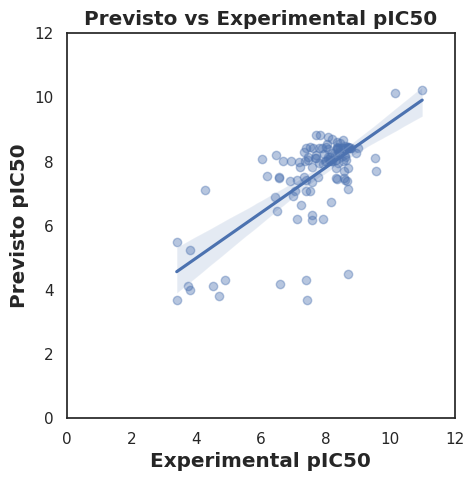

In [ ]:
import seaborn as sns # Importando o pacote seaborn para visualização de dados
import matplotlib.pyplot as plt # Importando o pacote matplotlib.pyplot para criação de gráficos
import pandas as pd # Importando o pacote pandas para manipulação de dados

sns.set(color_codes=True) # Definindo a cor do fundo para branco
sns.set_style("white") # Definindo o estilo do fundo para branco

data = pd.DataFrame({'Y_test': Y_test, 'Y_pred': Y_pred}) # Criando um DataFrame com os valores Y_test e Y_pred

ax = sns.regplot(data=data, x='Y_test', y='Y_pred', scatter_kws={'alpha':0.4}) # Criando um gráfico de dispersão com regressão
ax.set_title('Previsto vs Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Previsto pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12) # Definindo os limites do eixo X
ax.set_ylim(0, 12) # Definindo os limites do eixo Y
ax.figure.set_size_inches(5, 5) # Definindo o tamanho da figura
plt.show() # Exibindo o gráfico

Valores "Previstos": Esses são os valores que são gerados por um modelo ou método analítico. Eles são calculados com base em dados de entrada e em um modelo matemático ou estatístico. Em um modelo de regressão, por exemplo, os valores previstos representam as estimativas do modelo para as respostas ou resultados com base nas variáveis preditoras.

Valores "Experimentais" : Esses são os valores reais ou observados obtidos a partir de experimentos, medições ou observações da realidade. Os valores experimentais são os resultados reais que ocorrem na prática. Eles representam as medidas reais de um fenômeno ou sistema.

Em resumo, "previsto" se refere às estimativas feitas pelo modelo ou método analítico, enquanto "experimental" se refere aos valores reais ou observados obtidos por meio de experimentos ou medições na prática. Comparar esses dois conjuntos de valores é fundamental para avaliar o desempenho de modelos e métodos analíticos.

O **gráfico de dispersão com regressão linear**.

1. **Pontos no gráfico**:
   - Cada ponto representa um par de valores.
   - No eixo **x**, temos os valores experimentais de **pIC50** (que podem ser considerados como a resposta real ou observada).
   - No eixo **y**, temos os valores previstos de **pIC50** (calculados pelo modelo de regressão).

2. **Regressão linear**:
   - A linha reta no gráfico é a **linha de regressão linear**.
   - Essa linha representa a relação entre os valores previstos e os valores reais.
   - Ela mostra como os valores previstos se comportam em relação aos valores reais.
   - Se a linha estiver próxima dos pontos, significa que o modelo está fazendo boas previsões.

3. **Interpretação**:
   - Se os pontos estiverem próximos à linha, isso indica que o modelo está acertando as previsões.
   - Se os pontos estiverem espalhados longe da linha, pode haver erros nas previsões.
   - O coeficiente de determinação (R²) nos dirá o quão bem a linha de regressão se ajusta aos dados.

Em resumo, esse gráfico nos ajuda a avaliar o desempenho do modelo de regressão na previsão dos valores de **pIC50** com base nos dados experimentais.